#### Import Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

#### Load the CSV

In [2]:
# Load the CSV file into a DataFrame
t1 = pd.read_csv("/kaggle/input/mortality-rate-infant-per-1000-live-births/T1.csv")
columns = t1.iloc[0]
columns = [int(item) if isinstance(item, float) else item for item in columns]
t1= t1[1:]
t1.columns = columns

In [3]:
t1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,United Arab Emirates,ARE,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,135.5,128.9,122.5,116.2,109.9,103.3,...,7.0,6.8,6.7,6.5,6.3,6.2,6.0,5.8,5.6,5.4
2,Antigua and Barbuda,ATG,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,62.9,58.8,54.3,49.6,44.9,40.4,...,7.5,7.1,6.8,6.5,6.2,6.0,5.7,5.5,5.3,5.2
3,Australia,AUS,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,20.3,19.9,19.5,19.1,18.7,18.5,...,3.6,3.5,3.3,3.3,3.2,3.2,3.2,3.2,3.2,3.2
4,Austria,AUT,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,37.3,34.9,32.9,31.1,29.6,28.3,...,3.3,3.2,3.1,3.0,3.0,2.9,2.9,2.9,3.0,3.0
5,Belgium,BEL,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,29.4,28.1,27.0,26.0,25.0,24.0,...,3.5,3.4,3.4,3.4,3.3,3.4,3.4,3.4,3.4,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,British Virgin Islands,VGB,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,68.9,65.6,62.1,58.5,54.9,51.5,...,13.0,12.7,12.3,12.0,11.6,11.3,10.9,10.6,10.3,9.9
114,Vanuatu,VUT,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,104.5,101.9,99.0,96.1,93.1,90.2,...,23.9,23.7,23.3,22.9,22.4,21.9,21.4,20.9,20.3,19.7
115,Samoa,WSM,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,76.5,73.8,71.3,69.1,74.2,65.1,...,16.4,16.2,16.1,15.9,15.8,15.6,15.3,15.0,14.7,14.4
116,Zambia,ZMB,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,121.5,119.4,117.6,116.1,114.7,113.7,...,49.3,48.1,47.2,47.2,45.6,44.2,43.6,42.4,41.1,40.2


In [4]:
df = t1.merge(right=pd.read_csv("/kaggle/input/mortality-rate-infant-per-1000-live-births/T2.csv"), right_on='TableName', left_on='Country Name', how='inner')
df = df.drop(columns=['Indicator Name', 'Indicator Code', 'TableName', 'SpecialNotes'])

In [5]:
df

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,Region,IncomeGroup
0,Australia,AUS,20.3,19.9,19.5,19.1,18.7,18.5,18.3,18.2,...,3.3,3.3,3.2,3.2,3.2,3.2,3.2,3.2,East Asia & Pacific,High income
1,Austria,AUT,37.3,34.9,32.9,31.1,29.6,28.3,27.2,26.3,...,3.1,3.0,3.0,2.9,2.9,2.9,3.0,3.0,Europe & Central Asia,High income
2,Belgium,BEL,29.4,28.1,27.0,26.0,25.0,24.0,23.2,22.5,...,3.4,3.4,3.3,3.4,3.4,3.4,3.4,3.4,Europe & Central Asia,High income
3,Bangladesh,BGD,174.8,170.7,166.9,163.4,160.4,157.8,155.7,154.2,...,32.4,31.0,29.5,28.1,26.7,25.3,24.1,22.9,South Asia,Lower middle income
4,Canada,CAN,27.8,26.9,26.0,25.0,24.0,23.1,22.1,21.2,...,4.7,4.7,4.7,4.6,4.6,4.5,4.5,4.4,North America,High income
5,"Egypt, Arab Rep.",EGY,213.1,206.1,199.1,192.2,186.0,180.5,175.8,172.1,...,20.6,19.9,19.2,18.6,17.9,17.3,16.8,16.2,Middle East & North Africa,Lower middle income
6,Spain,ESP,46.8,44.9,42.9,40.9,39.0,37.2,35.5,33.7,...,2.8,2.8,2.7,2.7,2.7,2.7,2.6,2.6,Europe & Central Asia,High income
7,Finland,FIN,21.9,20.6,19.5,18.4,17.4,16.6,15.8,15.0,...,2.1,2.0,2.0,1.9,1.9,1.9,1.8,1.8,Europe & Central Asia,High income
8,France,FRA,23.6,22.4,21.4,20.4,19.4,18.6,17.8,17.2,...,3.1,3.2,3.2,3.3,3.4,3.4,3.4,3.4,Europe & Central Asia,High income
9,"Micronesia, Fed. Sts.",FSM,88.3,84.9,81.7,78.6,75.7,72.9,70.2,67.6,...,25.8,25.1,24.4,23.6,23.0,22.2,21.6,21.0,East Asia & Pacific,Lower middle income


#### Melt the data from wide to long format

In [6]:
# Identify columns to keep as identifiers (e.g., Country Name, Country Code, Region, IncomeGroup)
id_cols = ['Country Name', 'Country Code', 'Region', 'IncomeGroup']

In [7]:
# Melt the DataFrame to convert years from columns to rows
melted_df = pd.melt(df, id_vars=id_cols, var_name='Year', value_name='Mortality Rate')

In [8]:
# Convert 'Year' column to numeric (remove non-numeric characters)
melted_df['Year'] = pd.to_numeric(melted_df['Year'])


In [9]:
melted_df

,Country Name,Country Code,Region,IncomeGroup,Year,Mortality Rate
0,Australia,AUS,East Asia & Pacific,High income,1960,20.3
1,Austria,AUT,Europe & Central Asia,High income,1960,37.3
2,Belgium,BEL,Europe & Central Asia,High income,1960,29.4
3,Bangladesh,BGD,South Asia,Lower middle income,1960,174.8
4,Canada,CAN,North America,High income,1960,27.8
...,...,...,...,...,...,...
2909,Thailand,THA,East Asia & Pacific,Upper middle income,2021,7.1
2910,Uganda,UGA,Sub-Saharan Africa,Low income,2021,31.2
2911,Samoa,WSM,East Asia & Pacific,Lower middle income,2021,14.4
2912,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2021,40.2


#### Exploring the data

In [10]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    2914 non-null   object 
 1   Country Code    2914 non-null   object 
 2   Region          2914 non-null   object 
 3   IncomeGroup     2914 non-null   object 
 4   Year            2914 non-null   int64  
 5   Mortality Rate  2914 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 136.7+ KB


In [11]:
melted_df.isnull().sum()

Country Name      0
Country Code      0
Region            0
IncomeGroup       0
Year              0
Mortality Rate    0
dtype: int64

In [12]:
melted_df['Country Name'].unique()

array(['Australia', 'Austria', 'Belgium', 'Bangladesh', 'Canada',
       'Egypt, Arab Rep.', 'Spain', 'Finland', 'France',
       'Micronesia, Fed. Sts.', 'Ghana', 'Greece', 'Guatemala',
       'Honduras', 'Haiti', 'Indonesia', 'India', 'Ireland', 'Italy',
       'Japan', 'Kenya', 'Lebanon', 'Liberia', 'Lesotho', 'Luxembourg',
       'Marshall Islands', 'Malta', 'Mauritania', 'Nicaragua',
       'Netherlands', 'Nepal', 'New Zealand', 'Pakistan', 'Peru',
       'Portugal', 'Paraguay', 'Romania', 'Sudan', 'Singapore', 'Sweden',
       'Eswatini', 'Syrian Arab Republic', 'Thailand', 'Uganda', 'Samoa',
       'Zambia', 'Zimbabwe'], dtype=object)

In [13]:
melted_df['Region'].unique()

array(['East Asia & Pacific', 'Europe & Central Asia', 'South Asia',
       'North America', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'Latin America & Caribbean'], dtype=object)

In [14]:
melted_df['IncomeGroup'].unique()

array(['High income', 'Lower middle income', 'Upper middle income',
       'Low income'], dtype=object)

In [15]:
melted_df[melted_df['Country Name'] == 'Australia']

,Country Name,Country Code,Region,IncomeGroup,Year,Mortality Rate
0,Australia,AUS,East Asia & Pacific,High income,1960,20.3
47,Australia,AUS,East Asia & Pacific,High income,1961,19.9
94,Australia,AUS,East Asia & Pacific,High income,1962,19.5
141,Australia,AUS,East Asia & Pacific,High income,1963,19.1
188,Australia,AUS,East Asia & Pacific,High income,1964,18.7
...,...,...,...,...,...,...
2679,Australia,AUS,East Asia & Pacific,High income,2017,3.2
2726,Australia,AUS,East Asia & Pacific,High income,2018,3.2
2773,Australia,AUS,East Asia & Pacific,High income,2019,3.2
2820,Australia,AUS,East Asia & Pacific,High income,2020,3.2


In [16]:
# Assuming you have a DataFrame named dfm and a threshold value
mdfc = melted_df.copy()

threshold = 100

# Convert 'Mortality Rate' to numeric (assuming it contains strings)
mdfc['Mortality Rate'] = pd.to_numeric(mdfc['Mortality Rate'], errors='coerce')

# Create a new column 'Mortality Category' and initialize it as 'Low'
mdfc['Mortality Category'] = 'Low'

# Update 'Mortality Category' based on conditions
mdfc.loc[mdfc['Mortality Rate'] > threshold, 'Mortality Category'] = 'Middle'
mdfc.loc[mdfc['Mortality Rate'] > 150, 'Mortality Category'] = 'High'

In [17]:
mdfc

,Country Name,Country Code,Region,IncomeGroup,Year,Mortality Rate,Mortality Category
0,Australia,AUS,East Asia & Pacific,High income,1960,20.3,Low
1,Austria,AUT,Europe & Central Asia,High income,1960,37.3,Low
2,Belgium,BEL,Europe & Central Asia,High income,1960,29.4,Low
3,Bangladesh,BGD,South Asia,Lower middle income,1960,174.8,High
4,Canada,CAN,North America,High income,1960,27.8,Low
...,...,...,...,...,...,...,...
2909,Thailand,THA,East Asia & Pacific,Upper middle income,2021,7.1,Low
2910,Uganda,UGA,Sub-Saharan Africa,Low income,2021,31.2,Low
2911,Samoa,WSM,East Asia & Pacific,Lower middle income,2021,14.4,Low
2912,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2021,40.2,Low


#### Visualise the data

In [18]:
fig= px.pie(melted_df, values='Mortality Rate', names='Region', title='Sum of Mortality Rate by Region',template='plotly_dark')
fig.show()

In [19]:
fig2 = px.line(melted_df, x='Year', y='Mortality Rate', color='Country Name',
              template='plotly_dark',
              title='Mortality Rate Trends Over Time')

# Show the plot
fig2.show()

In [20]:
# Create a box plot for each year
fig3 = px.box(melted_df, x='Year', y='Mortality Rate',template='plotly_dark',
             title='Distribution of Mortality Rates Over Years')
# Show the plot
fig3.show()

In [21]:
# Create a choropleth map
fig4 = px.choropleth(melted_df, locations='Country Code', color='Mortality Rate',
                    animation_frame='Year', title='Mortality Rates by Country Over Time',
                    color_continuous_scale='Viridis')

# Show the plot
fig4.show()

In [22]:
# Create a scatter plot for a specific year
selected_year = 1960
fig9 = px.scatter(melted_df[melted_df['Year'] == selected_year], x='Mortality Rate', y='IncomeGroup', template='plotly_dark',
                 color='Country Name', title=f'Scatter Plot of Mortality Rates vs. Income Group ({selected_year})')

# Show the plot
fig9.show()

In [23]:
# Create a scatter plot for a specific year
selected_year = 1990
fig10 = px.scatter(melted_df[melted_df['Year'] == selected_year], x='Mortality Rate', y='IncomeGroup',template='plotly_dark',
                 color='Country Name', title=f'Scatter Plot of Mortality Rates vs. Income Group ({selected_year})')

# Show the plot
fig10.show()

In [24]:
# Create a scatter plot for a specific year
selected_year = 2020
fig5 = px.scatter(melted_df[melted_df['Year'] == selected_year], x='Mortality Rate', y='IncomeGroup',template='plotly_dark',
                 color='Country Name', title=f'Scatter Plot of Mortality Rates vs. Income Group ({selected_year})')

# Show the plot
fig5.show()

In [25]:
# Create a bubble map for mortality rates by country
fig6 = px.scatter_geo(melted_df, locations='Country Code', color='Mortality Rate',
                     hover_name='Country Name', size='Mortality Rate',animation_frame='Year',
                     projection='natural earth', title='Mortality Rates by Country')

# Show the plot
fig6.show()

In [26]:
# Create a treemap for mortality rates by region
fig7 = px.treemap(melted_df, path=['Region', 'Country Name'], values='Mortality Rate', template='plotly_dark',
                 title='Treemap of Mortality Rates by Region')

# Show the plot
fig7.show()

In [27]:
# Create an animated bar chart for mortality rates over time
fig8 = px.bar(melted_df, x='Country Name', y='Mortality Rate', color='Region',template='plotly_dark',
             animation_frame='Year', title='Animated Bar Chart of Mortality Rates Over Time')

# Show the plot
fig8.show()

In [28]:
# Create an animated bar chart for mortality rates over time
fig11 = px.bar(melted_df, x='IncomeGroup', y='Mortality Rate', color='Region',template='plotly_dark',
             animation_frame='Year', title='Animated Bar Chart of Mortality Rates Over Time')

# Show the plot
fig11.show()

In [29]:
fig12 = px.scatter_matrix(melted_df, dimensions=['Country Name', 'Region', 'IncomeGroup'], color='Country Name')
fig12.show()

#### Machine Learning: Time Series

In [30]:
tsdf = melted_df.copy()

In [31]:
# Convert the 'Year' column to datetime format
tsdf['Year'] = pd.to_datetime(tsdf['Year'], format='%Y')

In [32]:
# Sort the dataframe by 'Year'
tsdf.sort_values(by='Year', inplace=True)

# Check for missing values
if tsdf.isnull().values.any():
    tsdf = tsdf.dropna()

In [33]:
# Assuming 'Mortality Rate' is the column you want to forecast
time_series_data = tsdf[['Year', 'Mortality Rate', 'Country Name']]

time_series_data

,Year,Mortality Rate,Country Name
0,1960-01-01,20.3,Australia
26,1960-01-01,36.1,Malta
27,1960-01-01,130.4,Mauritania
28,1960-01-01,132.8,Nicaragua
29,1960-01-01,16.5,Netherlands
...,...,...,...
2885,2021-01-01,2.2,Italy
2886,2021-01-01,1.7,Japan
2887,2021-01-01,28.0,Kenya
2889,2021-01-01,56.7,Liberia


In [34]:
#Pivot the dataframe for time series analysis
time_series_data = time_series_data.pivot(index='Year', columns='Country Name', values='Mortality Rate')

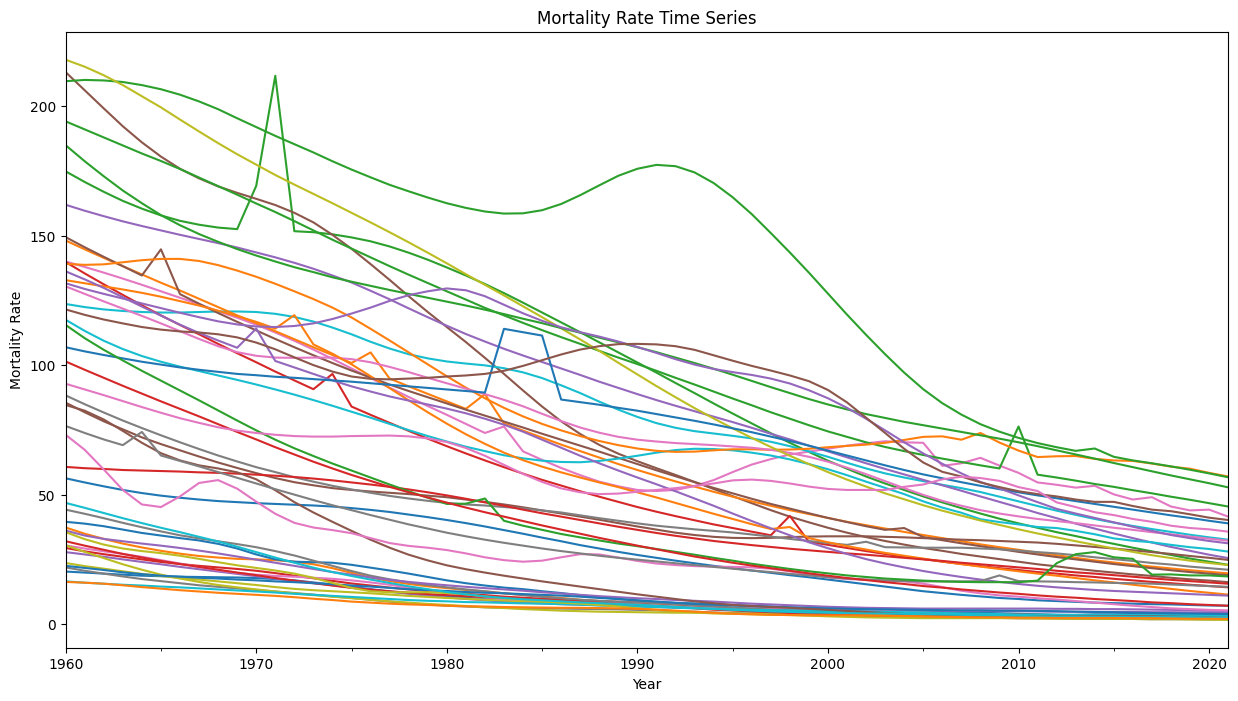

In [35]:
# Visualize the time series data
time_series_data.plot(figsize=(15, 8), legend=False)
plt.title('Mortality Rate Time Series')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.show()

In [36]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [37]:
# Function to fit ARIMA model and make predictions
def fit_arima(country_series):
    model = ARIMA(country_series, order=(5,1,0))  # Adjust order as needed
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(country_series), end=len(country_series)+5, typ='levels')
    return predictions

In [38]:
# Loop through each country to fit the model and make predictions
predictions_dict = {}
for country in time_series_data.columns:
    country_series = time_series_data[country].dropna()
    if len(country_series) > 5:  # Ensure enough data points for training
        predictions = fit_arima(country_series)
        predictions_dict[country] = predictions

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency informat

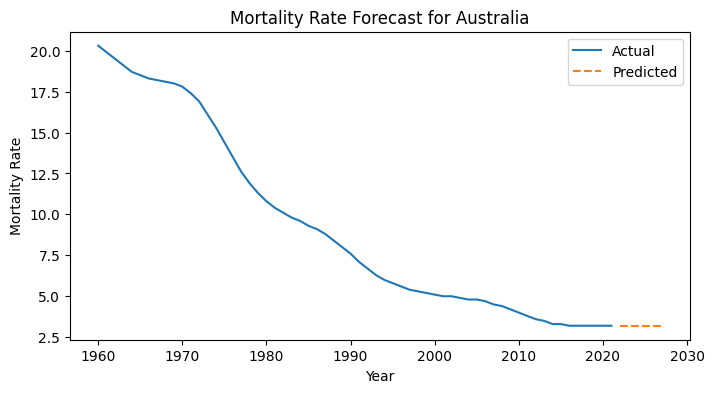

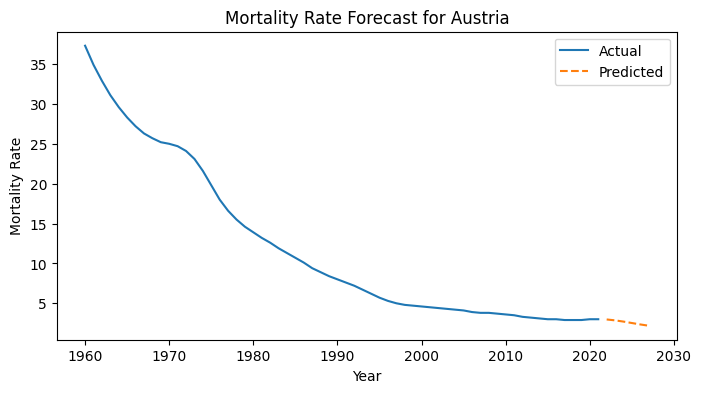

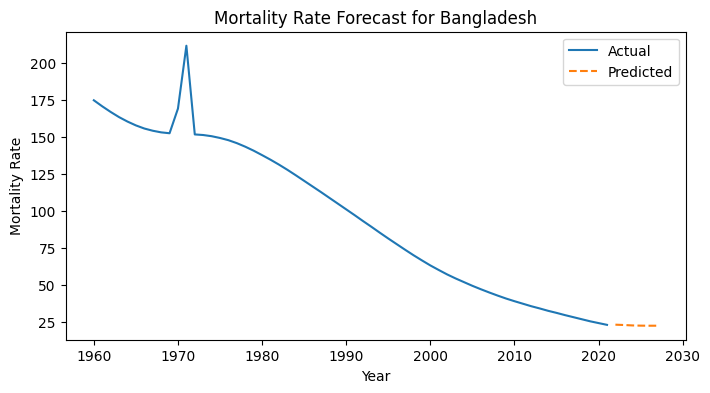

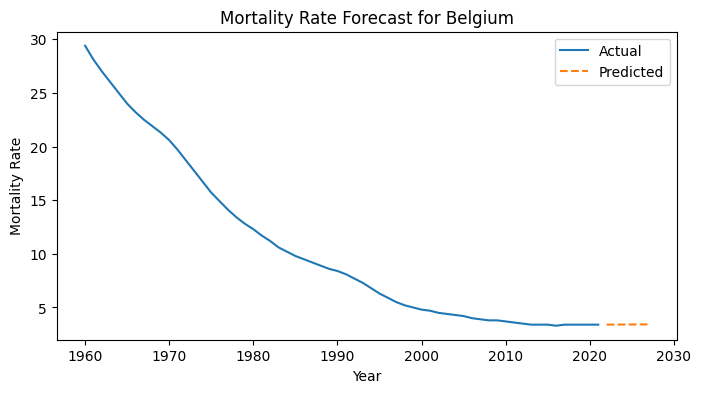

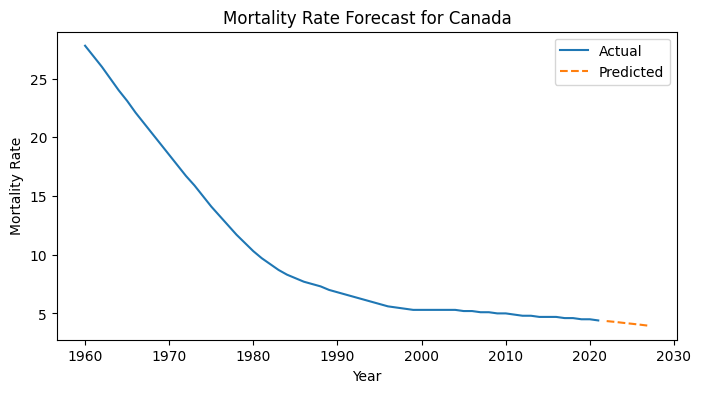

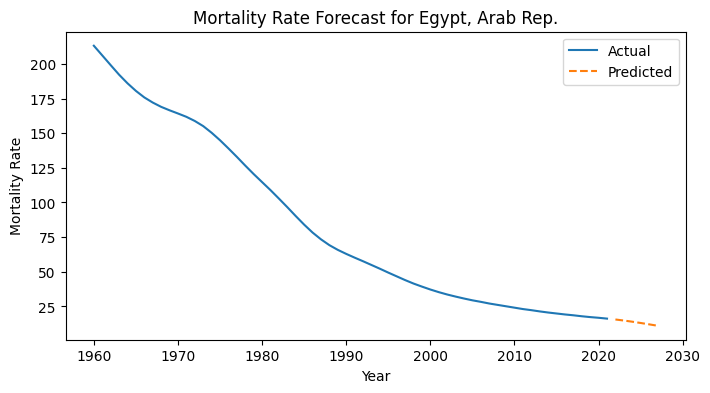

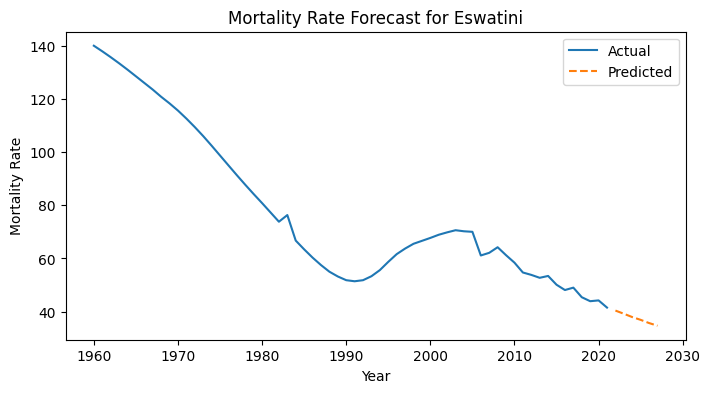

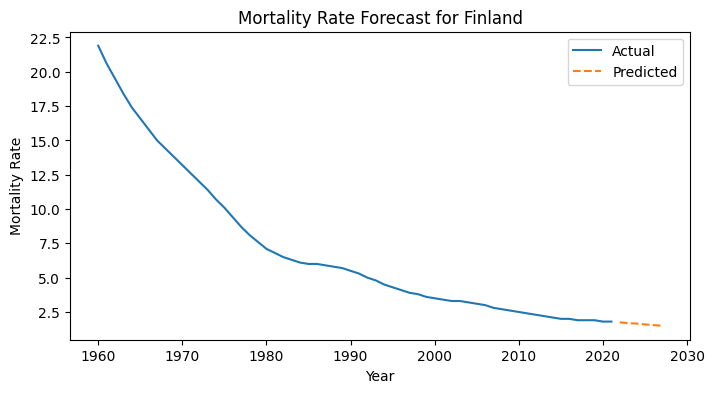

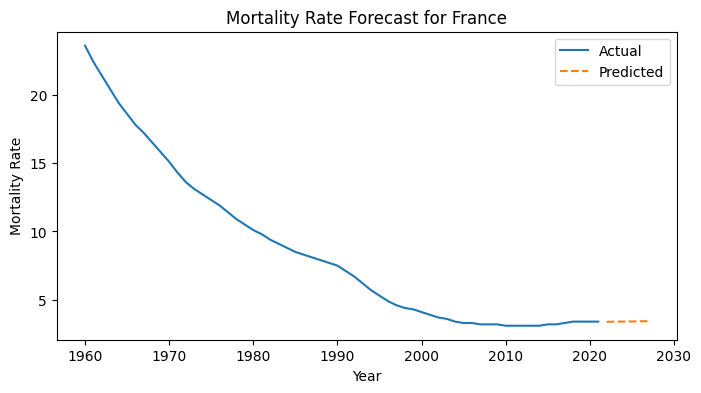

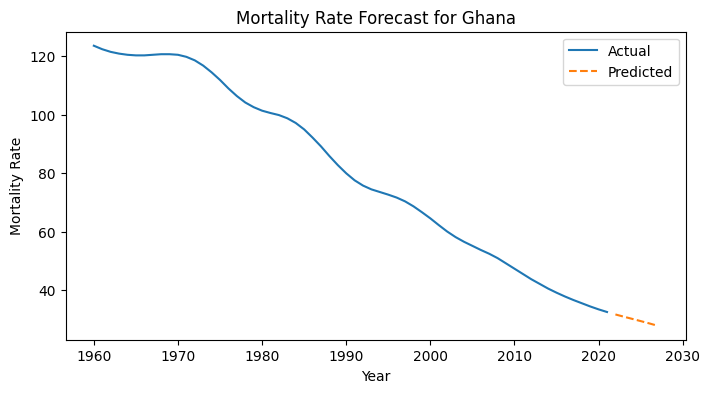

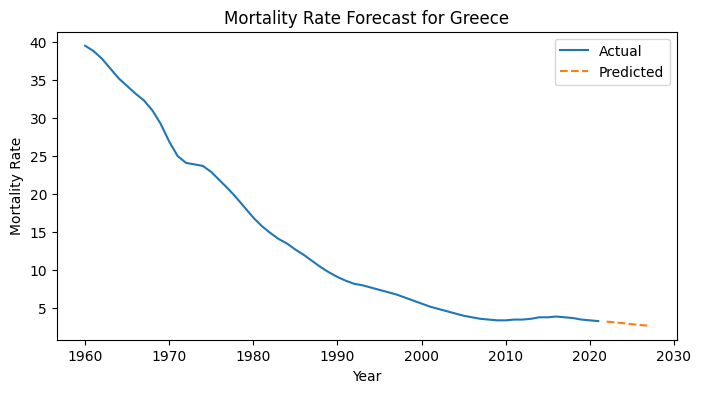

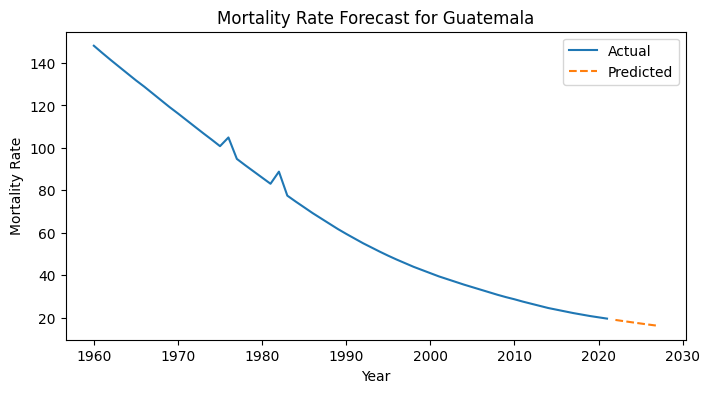

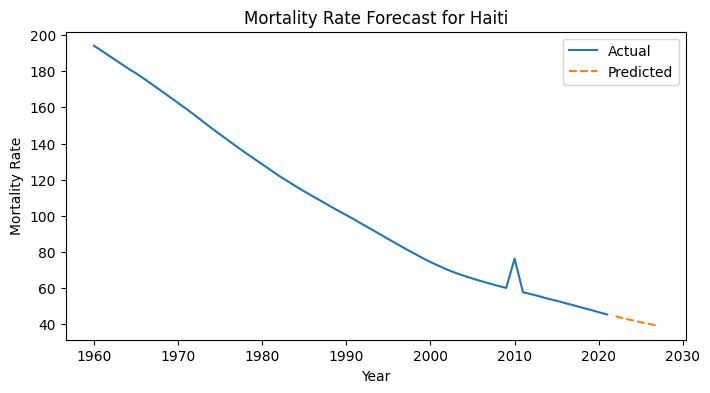

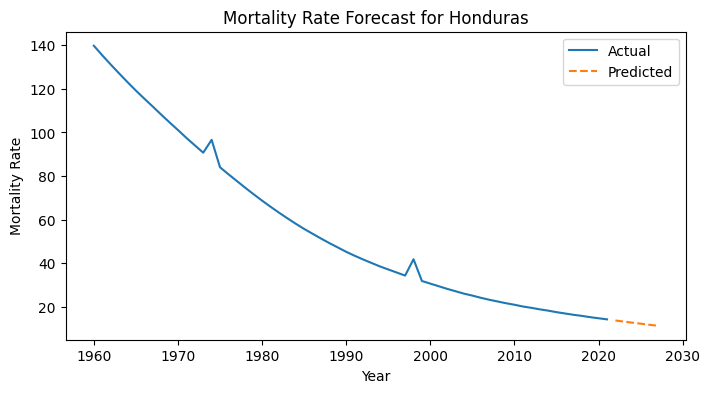

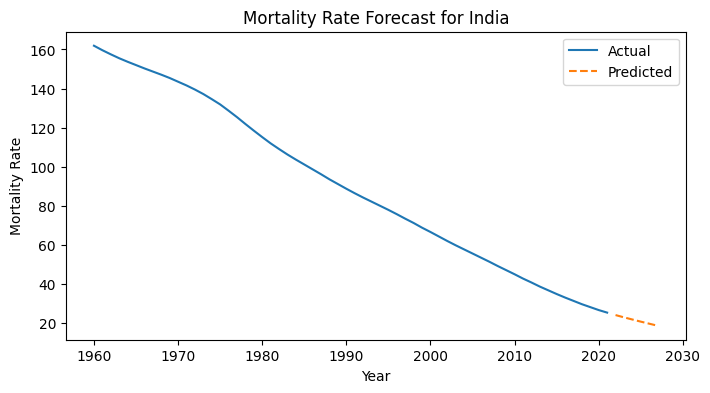

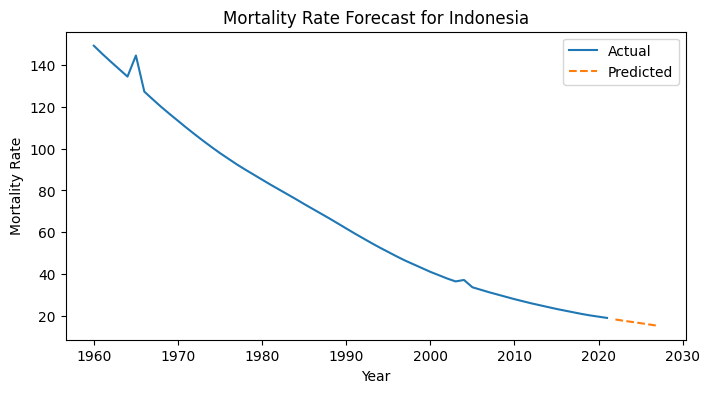

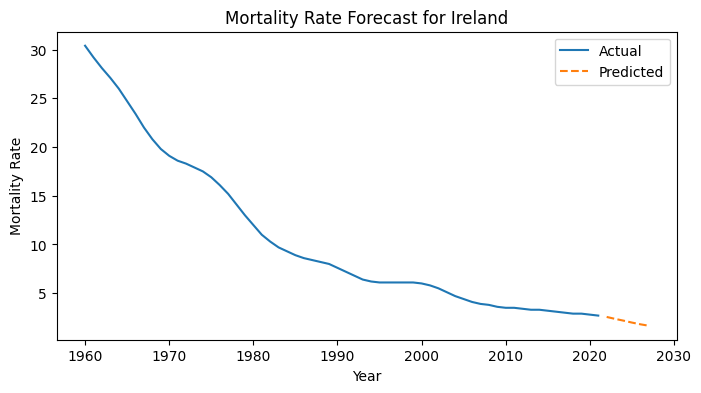

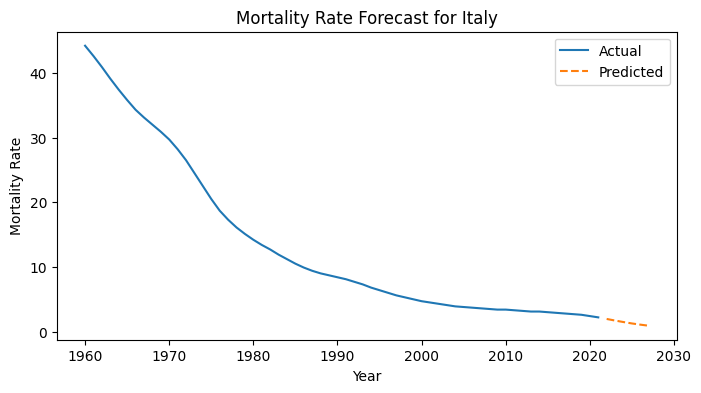

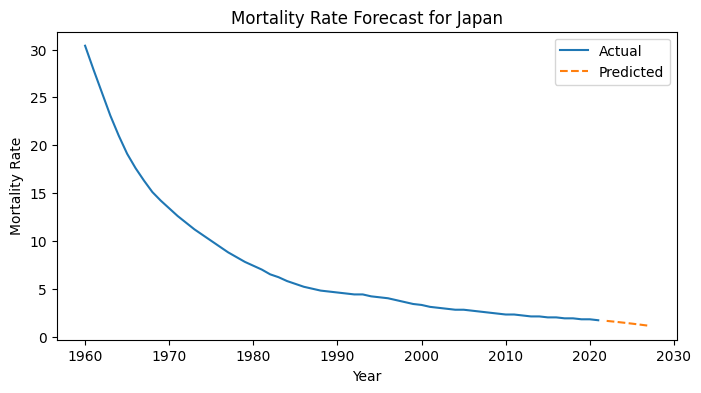

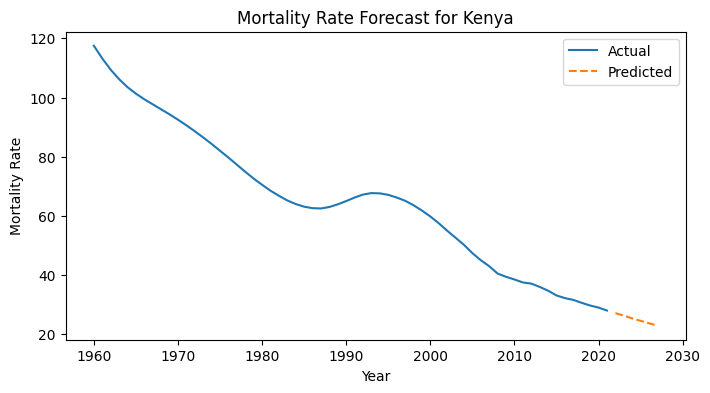

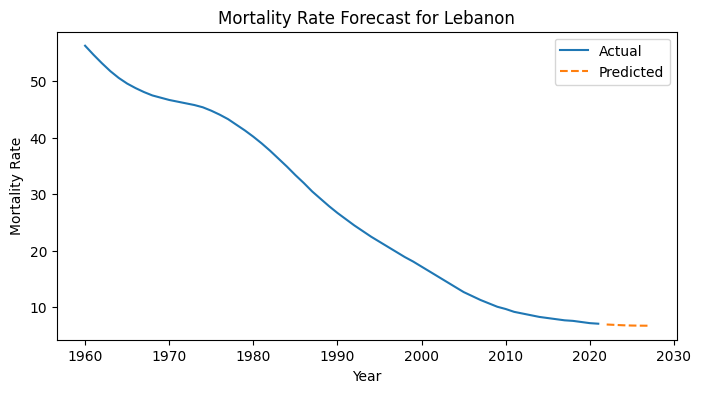

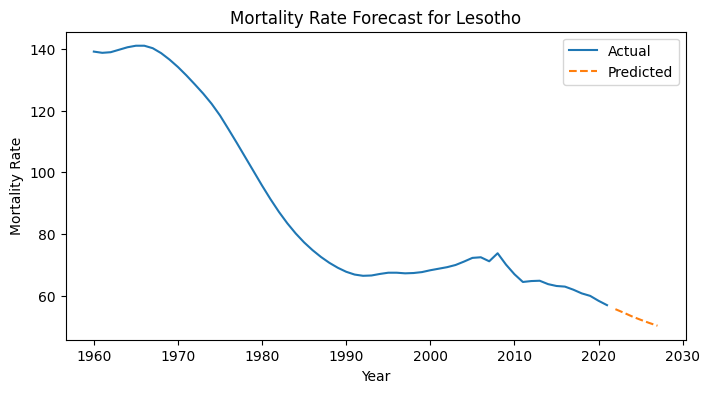

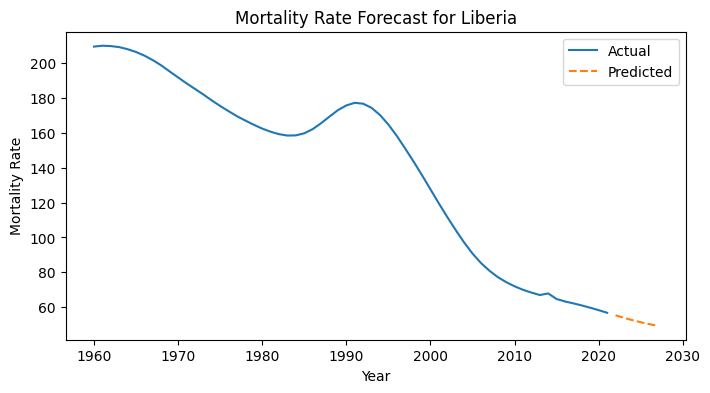

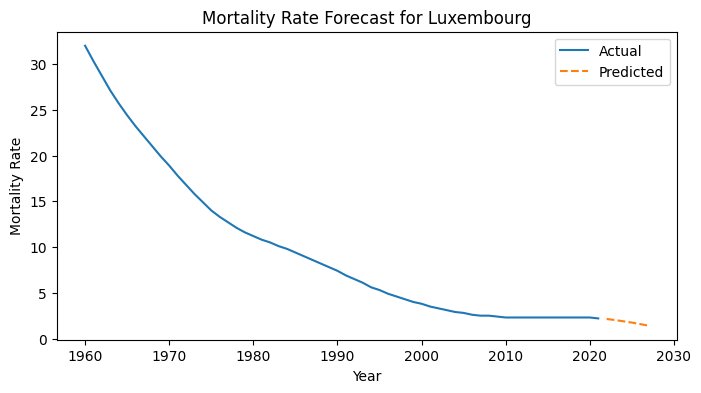

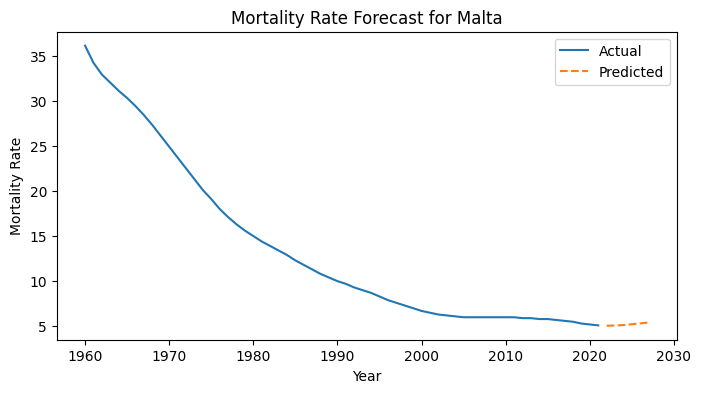

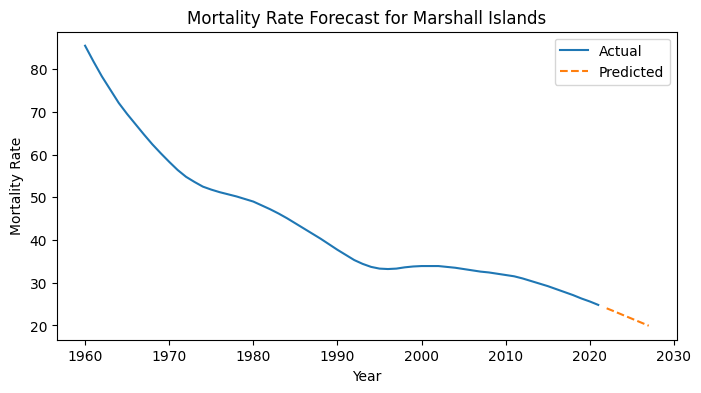

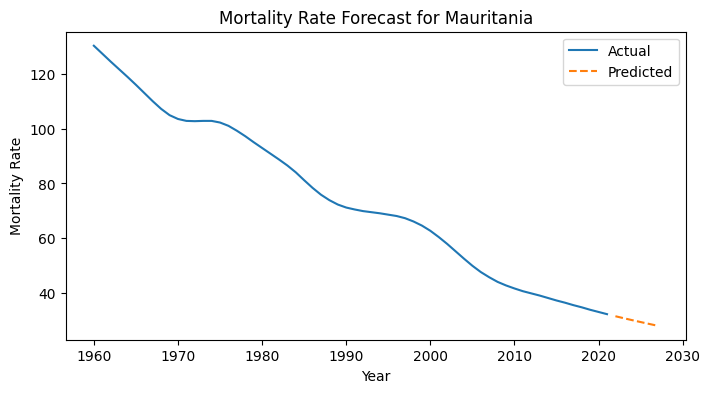

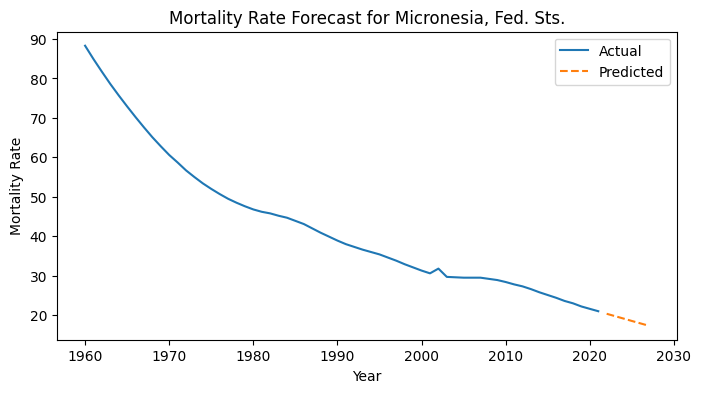

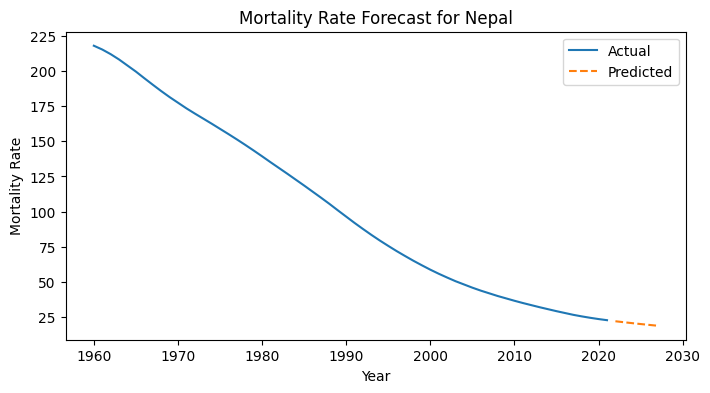

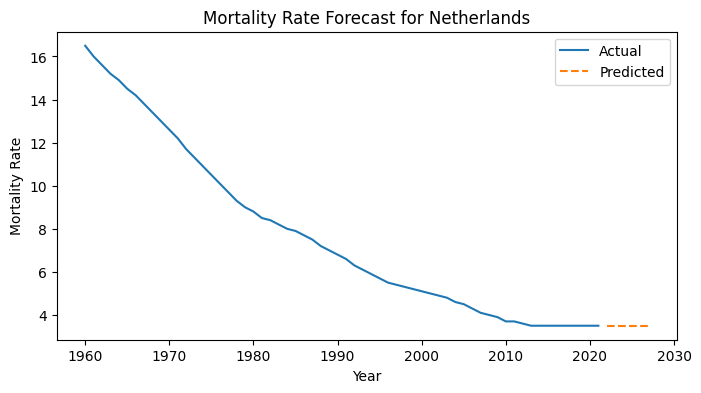

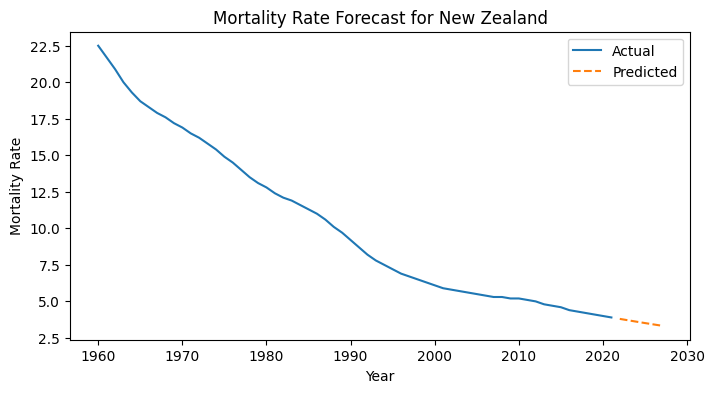

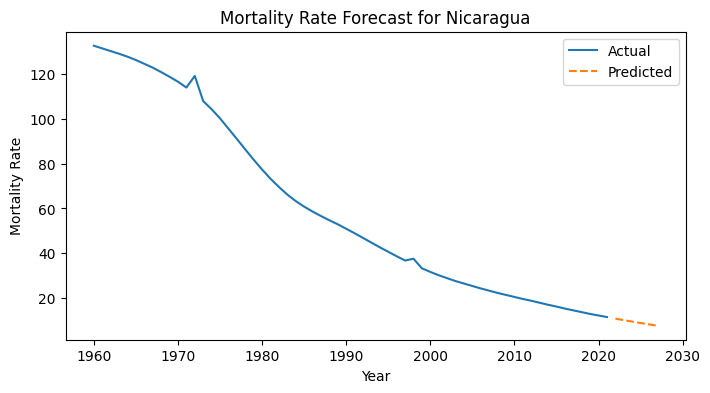

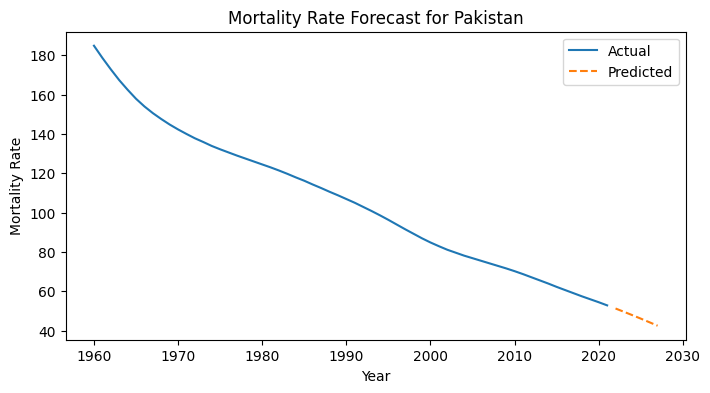

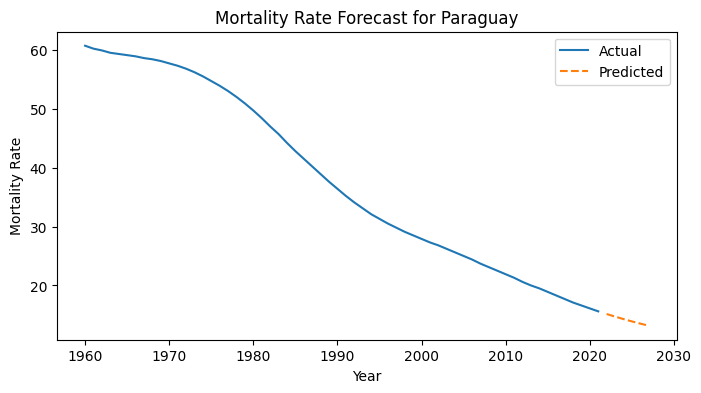

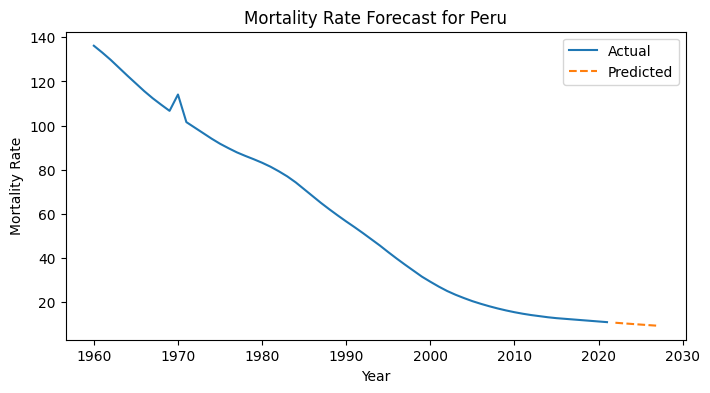

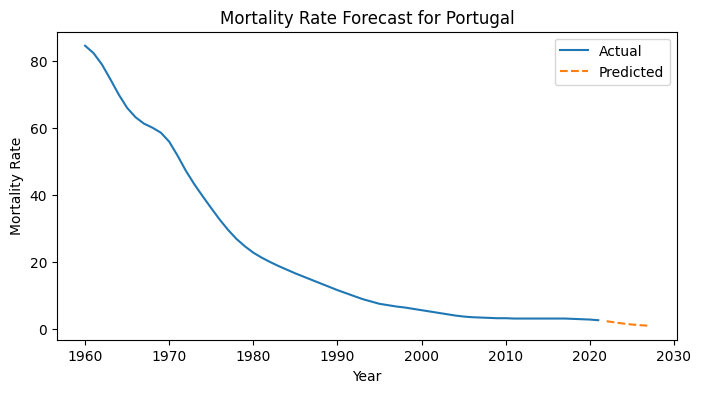

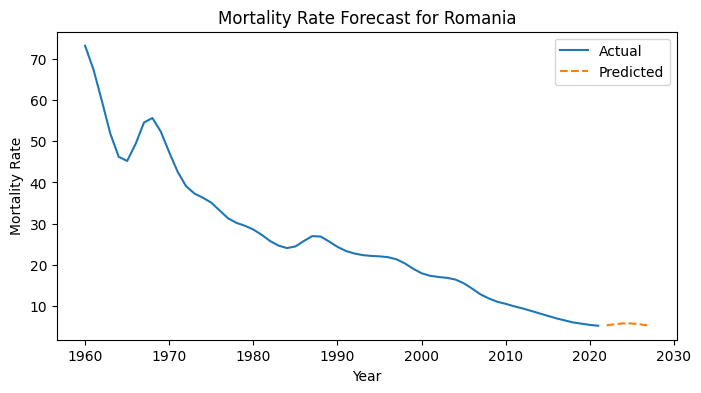

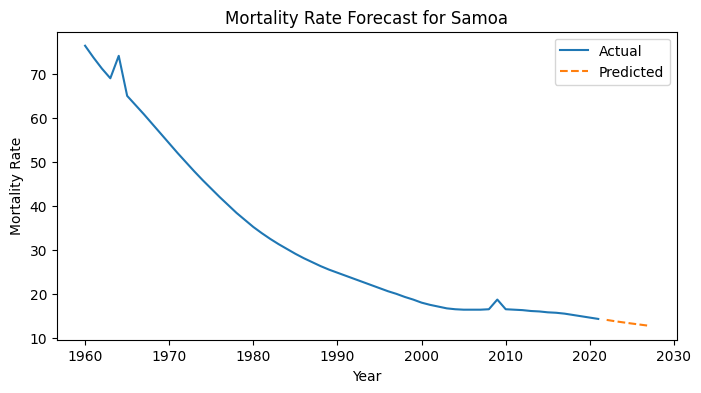

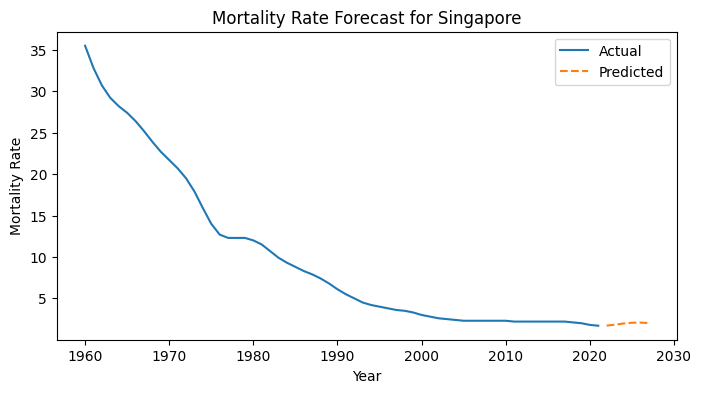

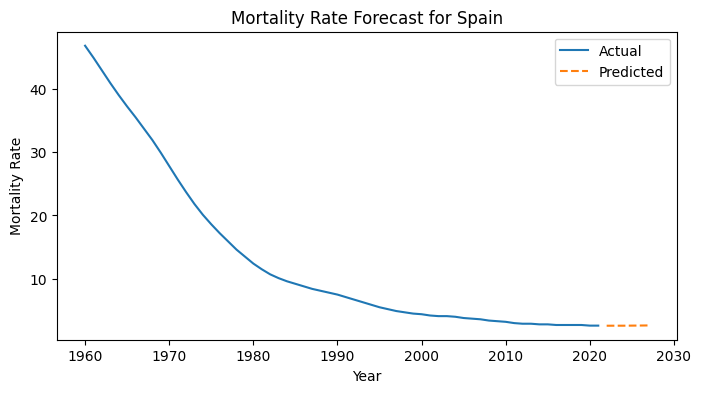

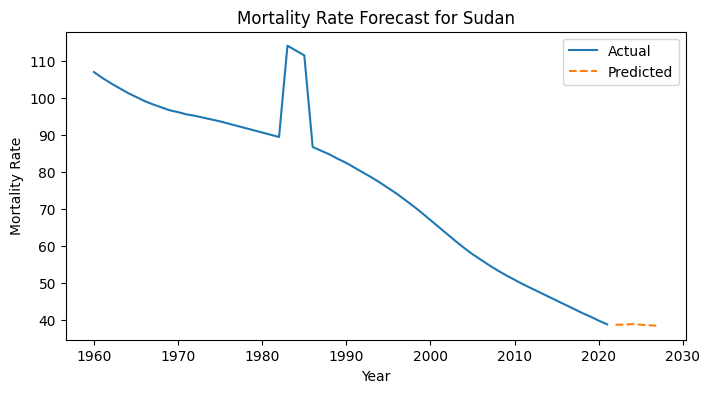

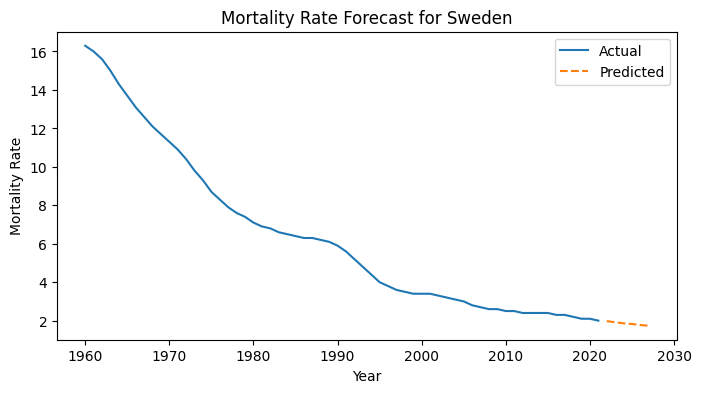

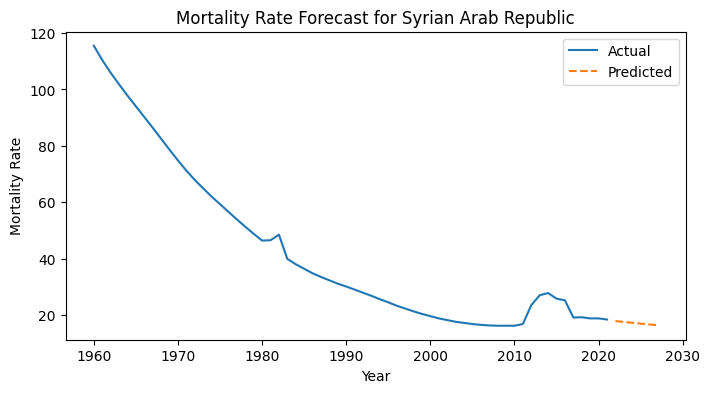

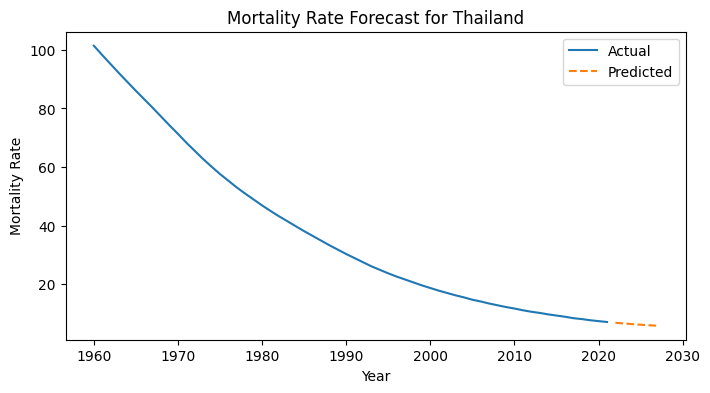

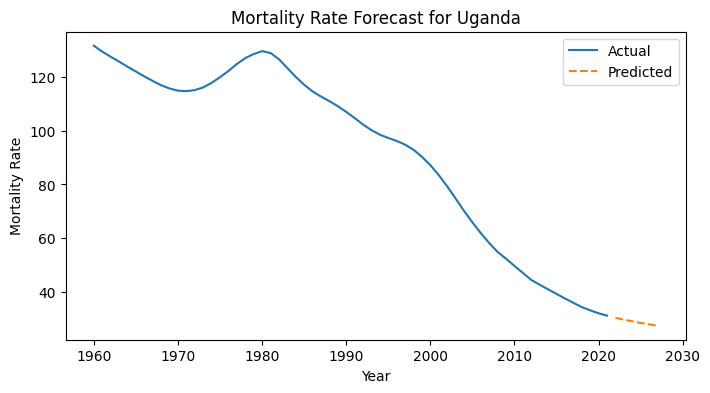

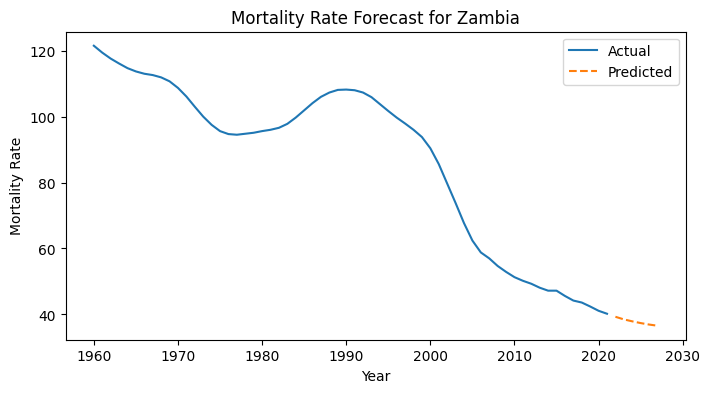

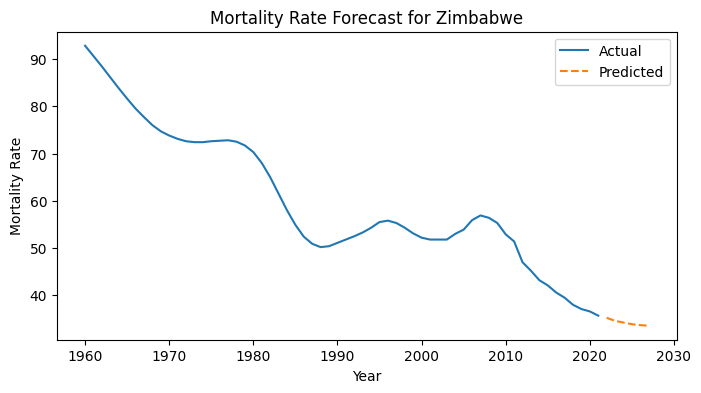

In [39]:
# Visualize the predicted values
for country, predictions in predictions_dict.items():
    plt.figure(figsize=(8, 4))
    plt.plot(time_series_data.index, time_series_data[country], label='Actual')
    plt.plot(predictions.index, predictions, label='Predicted', linestyle='dashed')
    plt.title(f'Mortality Rate Forecast for {country}')
    plt.xlabel('Year')
    plt.ylabel('Mortality Rate')
    plt.legend()
    plt.show()